Importing

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Y2S2/TSAP/'
df = pd.read_csv(file_path + 'stack_overflow.csv')
df_2 = pd.read_csv(file_path + 'stack_overflowpart2.csv')

Understanding

In [ ]:
df.head()

,link,upvotes,answers,views,content,code_length
0,https://stackoverflow.com/questions/64549091/p...,1,2,2000,Python Script not exiting with keyboard Interr...,470
1,https://stackoverflow.com/questions/61982514/p...,2,2,8000,"""Permission denied"" while using flask\nI am tr...",1115
2,https://stackoverflow.com/questions/77890528/f...,0,0,3,Formula to get real USD value from pricing_exp...,816
3,https://stackoverflow.com/questions/76532891/i...,2,2,188,I have 2 lines plotted with plotly-express. Ho...,505
4,https://stackoverflow.com/questions/77890522/p...,0,0,7,Programming with broken right hand\nI broke my...,0


In [ ]:
df_2.head()

,link,upvotes,answers,views,content,code_length
0,https://stackoverflow.com/questions/77881945/i...,1,1,149,"In Django, when i compare two Html texts, how ...",7655
1,https://stackoverflow.com/questions/77886183/m...,0,0,17,Multi-scoring with GridSearchCV\ni am trying t...,1052
2,https://stackoverflow.com/questions/77887996/h...,-1,0,57,How do I access a custom tag in a company's 10...,2410
3,https://stackoverflow.com/questions/77883716/u...,0,0,20,"Using python and visual studio, how do I inter...",2539
4,https://stackoverflow.com/questions/77888095/f...,0,0,44,For loop in python through a list behaves weir...,938


In [ ]:
df.isnull().sum()

link           0
upvotes        0
answers        0
views          0
content        0
code_length    0
dtype: int64

In [ ]:
df_2.isnull().sum()

link           0
upvotes        0
answers        0
views          0
content        0
code_length    0
dtype: int64

In [ ]:
df.duplicated().sum()

297

In [ ]:
df_2.duplicated().sum()

1535

It looks like some rows are duplicated within the scraping process. This could be because some posts appeared in multiple filter tags, of which we scraped. Let's remove these duplicates.

In [ ]:
df.drop_duplicates(keep='first', inplace=True)
df_2.drop_duplicates(keep='first', inplace=True)

In [ ]:
df = pd.concat([df, df_2], ignore_index=True)
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.head()

,link,upvotes,answers,views,content,code_length
0,https://stackoverflow.com/questions/64549091/p...,1,2,2000,Python Script not exiting with keyboard Interr...,470
1,https://stackoverflow.com/questions/61982514/p...,2,2,8000,"""Permission denied"" while using flask\nI am tr...",1115
2,https://stackoverflow.com/questions/77890528/f...,0,0,3,Formula to get real USD value from pricing_exp...,816
3,https://stackoverflow.com/questions/76532891/i...,2,2,188,I have 2 lines plotted with plotly-express. Ho...,505
4,https://stackoverflow.com/questions/77890522/p...,0,0,7,Programming with broken right hand\nI broke my...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9697 entries, 0 to 10367
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   link         9697 non-null   object
 1   upvotes      9697 non-null   int64 
 2   answers      9697 non-null   int64 
 3   views        9697 non-null   int64 
 4   content      9697 non-null   object
 5   code_length  9697 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 530.3+ KB


In [ ]:
df.to_csv(file_path + 'stack_overflowMerged.csv')

We shall begin with categorization

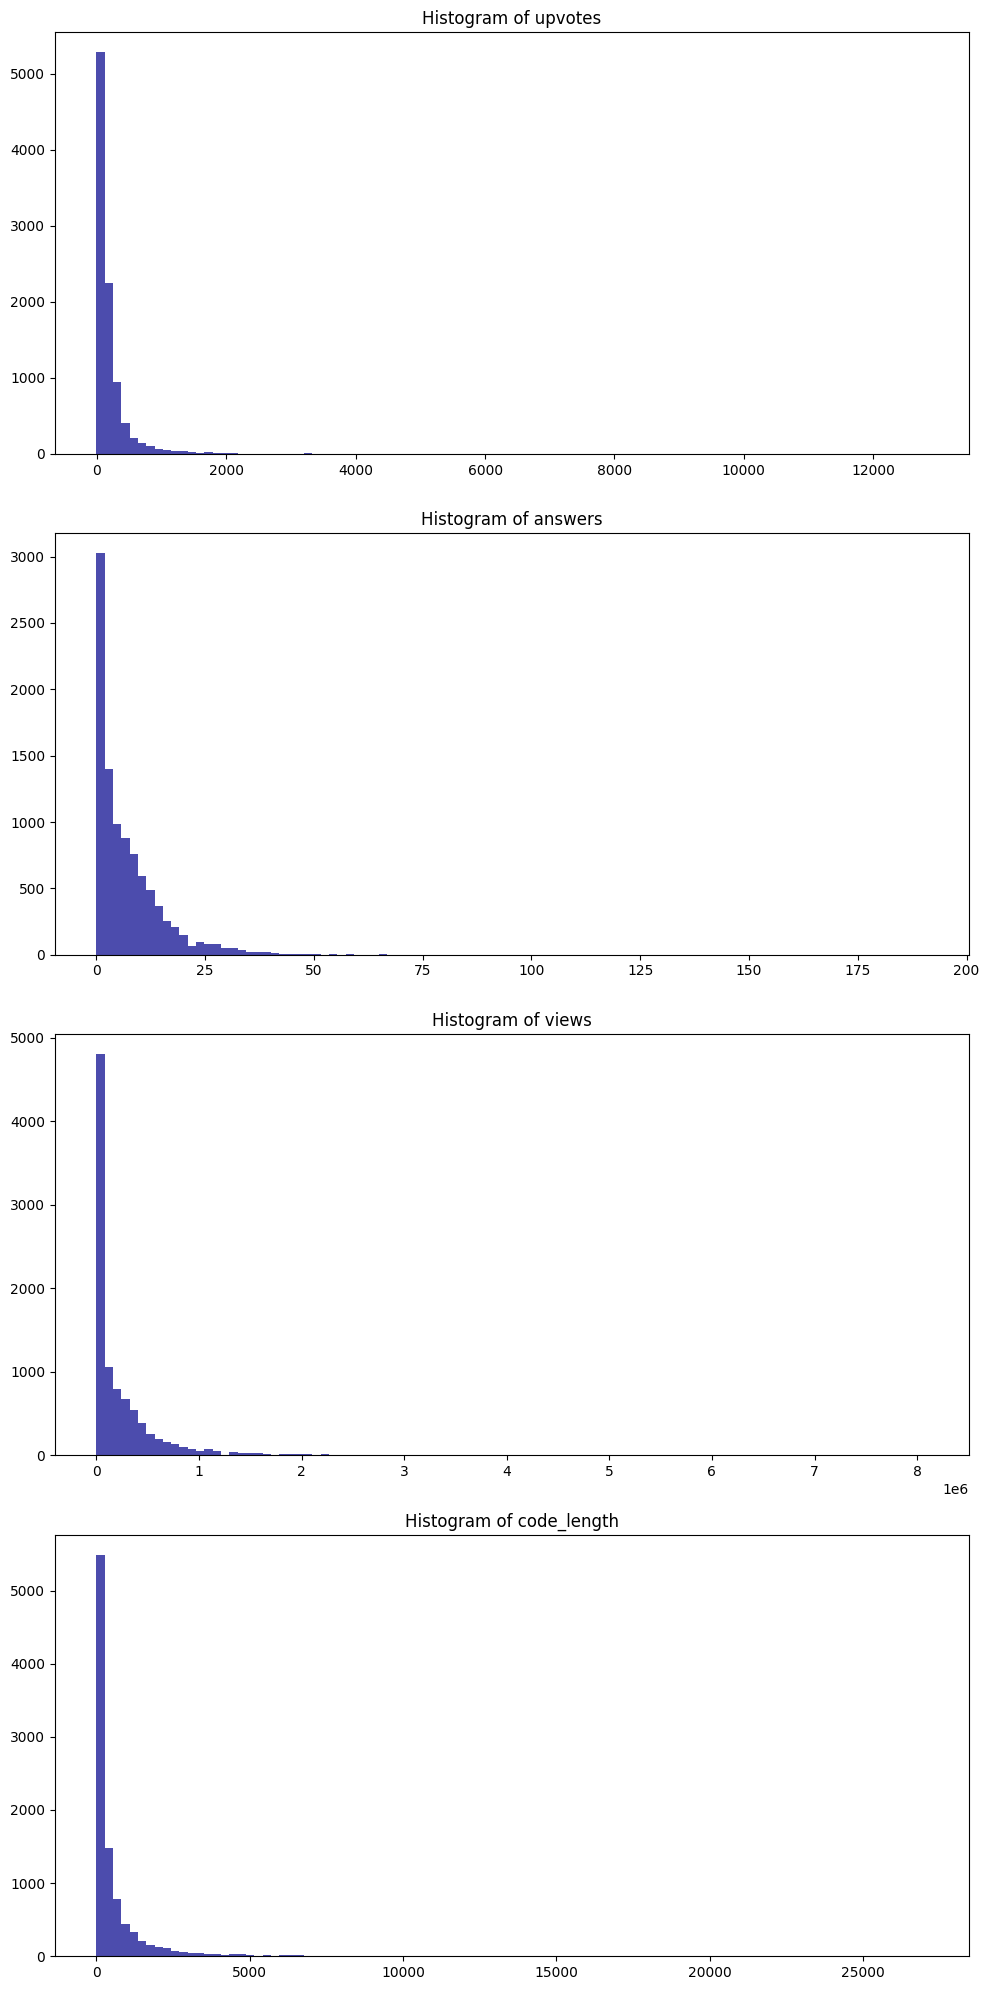

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it contains 'upvotes', 'answers', 'views', 'code_length'

variables = ['upvotes', 'answers', 'views', 'code_length']

# Find the global min and max for each variable
global_min_max = {var: (df[var].min(), df[var].max()) for var in variables}

# Plot the histograms
fig, axs = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 5 * len(variables)))

for i, var in enumerate(variables):
    # Select the range based on global min and max
    bin_range = global_min_max[var]

    # Plot histograms for the variable on the subplot
    axs[i].hist(df[var], bins=100, range=bin_range, color='darkblue', alpha=0.7)
    axs[i].set_title(f'Histogram of {var}')

plt.tight_layout()
plt.show()

wow its really skewed to the left.

Column upvotes contains non-positive values. Adjusting them to a small positive number.
Column answers contains non-positive values. Adjusting them to a small positive number.
Column code_length contains non-positive values. Adjusting them to a small positive number.


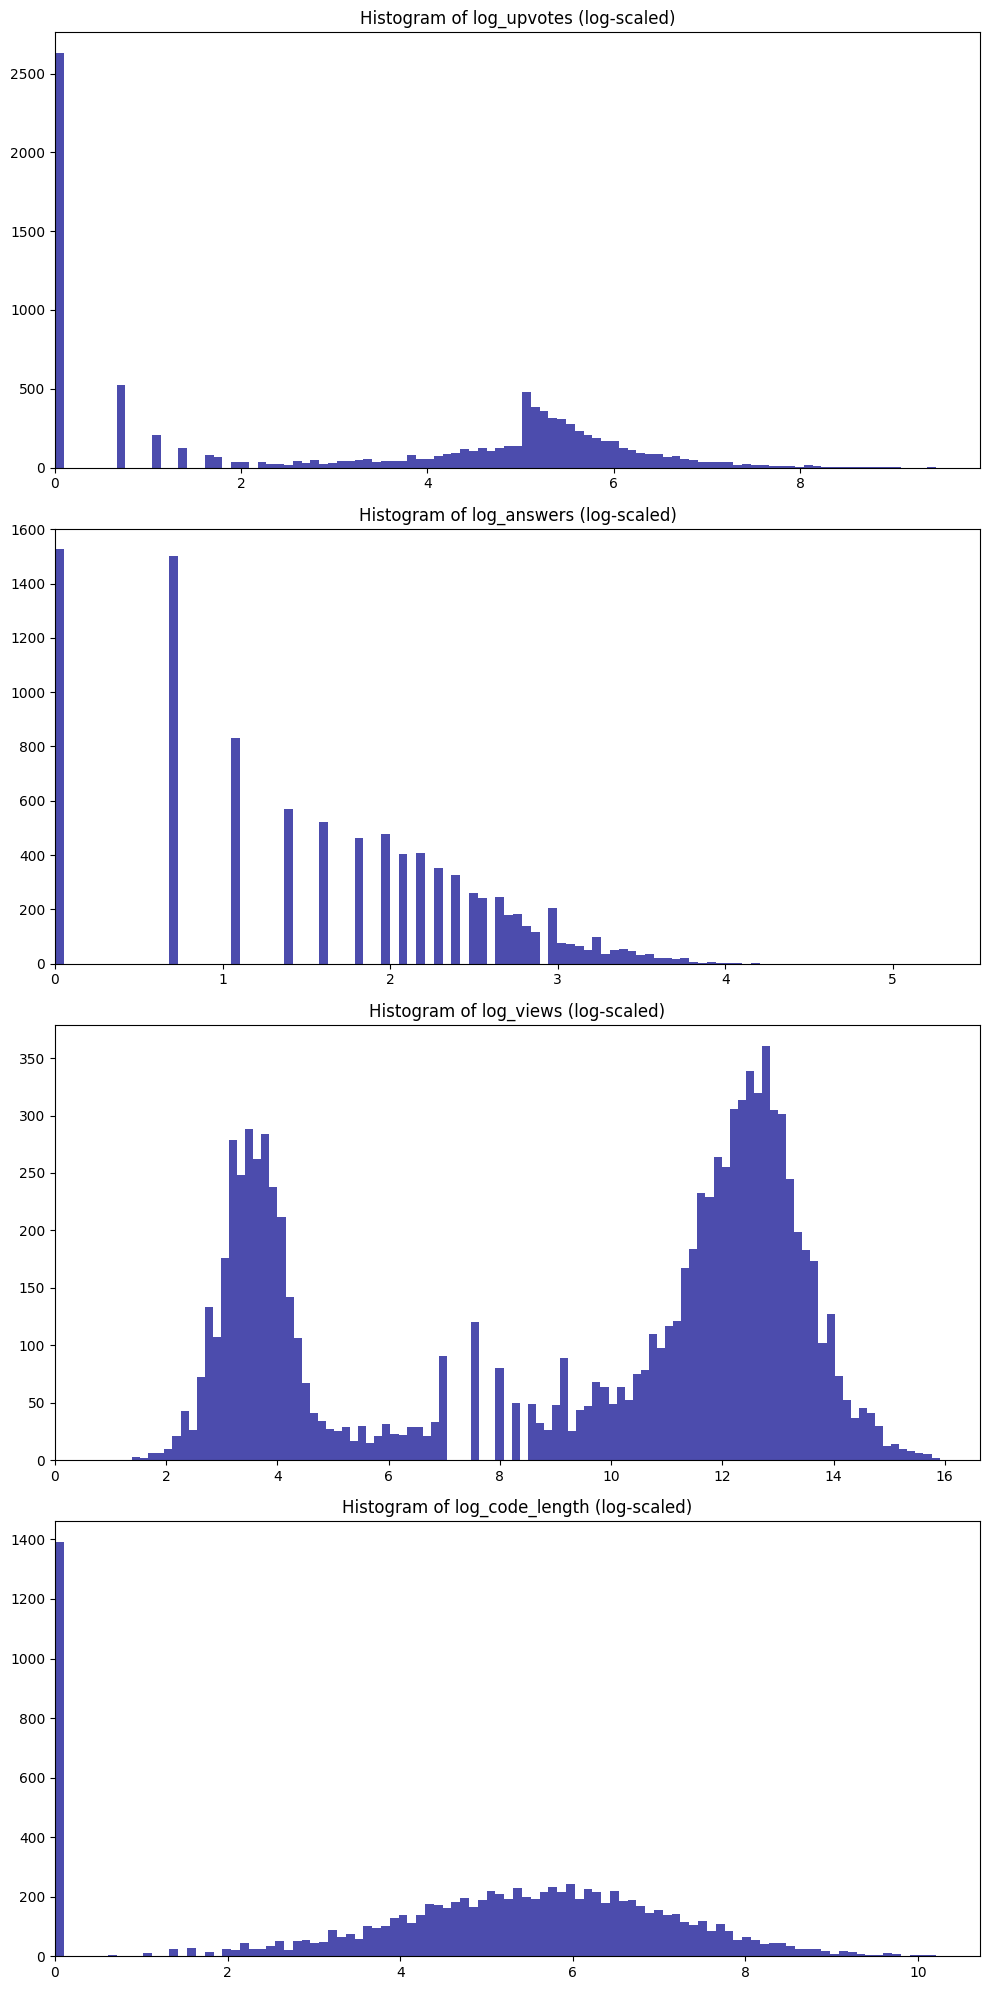

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Check for any non-positive values in the data
non_positive_columns = ['upvotes', 'answers', 'views', 'code_length']
for col in non_positive_columns:
    if (df[col] <= 0).any():
        print(f"Column {col} contains non-positive values. Adjusting them to a small positive number.")
        df[col] = df[col].clip(lower=np.finfo(float).eps)

# Apply the log transformation correctly
df['log_upvotes'] = np.log1p(df['upvotes'])
df['log_answers'] = np.log1p(df['answers'])
df['log_views'] = np.log1p(df['views'])
df['log_code_length'] = np.log1p(df['code_length'])

variables_log = ['log_upvotes', 'log_answers', 'log_views', 'log_code_length']

# Plot the histograms for log-transformed variables
fig, axs = plt.subplots(nrows=len(variables_log), ncols=1, figsize=(10, 20))

for i, var in enumerate(variables_log):
    # Plot histograms for the log-transformed variable
    axs[i].hist(df[var], bins=100, color='darkblue', alpha=0.7)
    axs[i].set_title(f'Histogram of {var} (log-scaled)')

# Set x-axis limits to avoid negative values in log scale
for ax in axs:
    ax.set_xlim(left=0)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the 25th and 75th percentiles for each log-transformed column
percentile_25_upvotes = df['log_upvotes'].quantile(0.25)
percentile_75_upvotes = df['log_upvotes'].quantile(0.75)

percentile_25_answers = df['log_answers'].quantile(0.25)
percentile_75_answers = df['log_answers'].quantile(0.75)

percentile_25_views = df['log_views'].quantile(0.25)
percentile_75_views = df['log_views'].quantile(0.75)

# Function to categorize values into 'Low', 'Moderate', 'High'
def categorize(value, percentile_25, percentile_75):
    if value <= percentile_25:
        return 'Low'
    elif value > percentile_75:
        return 'High'
    else:
        return 'Moderate'

# Apply the categorization
df['upvotes_category'] = df['log_upvotes'].apply(lambda x: categorize(x, percentile_25_upvotes, percentile_75_upvotes))
df['answers_category'] = df['log_answers'].apply(lambda x: categorize(x, percentile_25_answers, percentile_75_answers))
df['views_category'] = df['log_views'].apply(lambda x: categorize(x, percentile_25_views, percentile_75_views))

# Display the relevant columns
df[['log_upvotes', 'upvotes_category', 'log_answers', 'answers_category', 'log_views', 'views_category']].head()

,log_upvotes,upvotes_category,log_answers,answers_category,log_views,views_category
0,0.693147,Moderate,1.098612,Moderate,7.601402,Moderate
1,1.098612,Moderate,1.098612,Moderate,8.987322,Moderate
2,0.000000,Low,0.000000,Low,1.386294,Low
3,1.098612,Moderate,1.098612,Moderate,5.241747,Moderate
4,0.000000,Low,0.000000,Low,2.079442,Low


In [ ]:
# Perform value_counts for the different categories and display them
upvotes_counts = df['upvotes_category'].value_counts()
answers_counts = df['answers_category'].value_counts()
views_counts = df['views_category'].value_counts()

upvotes_counts, answers_counts, views_counts

(Moderate    4642
 Low         2631
 High        2424
 Name: upvotes_category, dtype: int64,
 Moderate    4358
 Low         3026
 High        2313
 Name: answers_category, dtype: int64,
 Moderate    4839
 Low         2436
 High        2422
 Name: views_category, dtype: int64)

Great. We now have the categories to apply our logic to.

The role of Views is to show the passive engagement of the question. A question that has higher views is more applicable and relevant more people, and is less niche.

The role of Upvotes is to show the sentiment of the question. A question with higher upvotes are more helpful and popular, voted by the community.

The role of Answers is to show the discussion level of the question, aka active engagement. It is more of a double-edged sword, in the sense that it can amplify the sentiment of the question. A question with high answers and high upvotes can be very insightful, low answers and high upvotes can be perhaps less insightful. Similarity, A question with low answers and low upvotes can be a dumb question, but a question with high answers and low upvotes, can be a even dumber question, with more people chatting in the answers to critique you.

Thus, we shall create a scoring system.

Low, Moderate, High upvotes = (-1, 1, 3) # base

Low, Moderate, High views = (x1, x2, x3)

Low, Moderate, High answers = (x1, x3, x4) # active discussion. will impact more.

In [ ]:
import itertools

combinations = list(itertools.product(['Low', 'Moderate', 'High'], repeat=3))
# Define the scoring system
upvotes_scores = {
    'Low': -1,
    'Moderate': 1,
    'High': 3
}

# Define the values for views and answers
views_multiplication = {
    'Low': 1,
    'Moderate': 2,
    'High': 3
}

answers_multiplication = {
    'Low': 1,
    'Moderate': 3,
    'High': 4
}

scores_dict = {}
# Calculate scores for each combination
for upvotes, views, answers in combinations:
    total_score = upvotes_scores[upvotes] * views_multiplication[views] * answers_multiplication[answers]
    scores_dict[(upvotes, views, answers)] = total_score

scores_df = pd.DataFrame(list(scores_dict.items()), columns=['Combination', 'Total Score'])

# Sort the DataFrame by score
scores_df = scores_df.sort_values(by='Total Score', ascending=False)

# Reset the index
scores_df = scores_df.reset_index(drop=True)

scores_df


,Combination,Total Score
0,"(High, High, High)",36
1,"(High, High, Moderate)",27
2,"(High, Moderate, High)",24
3,"(High, Moderate, Moderate)",18
4,"(High, Low, High)",12
5,"(Moderate, High, High)",12
6,"(High, High, Low)",9
7,"(High, Low, Moderate)",9
8,"(Moderate, High, Moderate)",9
9,"(Moderate, Moderate, High)",8


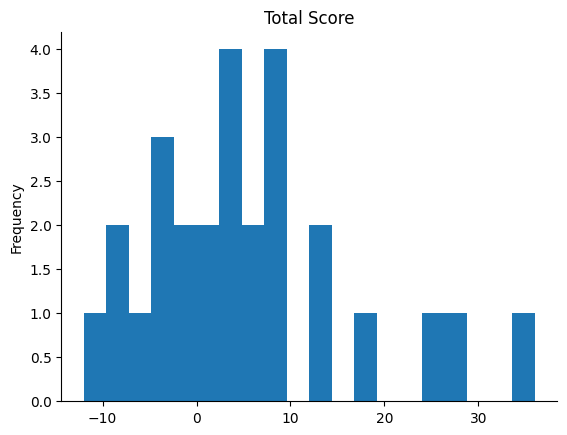

In [ ]:
from matplotlib import pyplot as plt
scores_df['Total Score'].plot(kind='hist', bins=20, title='Total Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

Great. Now let's discuss our threshold. We have 26 combinations. the popularity distribution should follow similarly to a normal distribution.

25%popular, 50% decent, 25% popular.

This roughly translates to 6 popular combinations, 14 decent combinations, and 6 unpopular combinations.

In [ ]:
# Define the number of combinations for each category
popular_count = 6
decent_count = 14
unpopular_count = 6

# Get the combinations for each category based on their position in scores_df
popular_combinations = scores_df.head(popular_count)['Combination']
decent_combinations = scores_df.iloc[popular_count:popular_count+decent_count+1]['Combination']
unpopular_combinations = scores_df.tail(unpopular_count)['Combination']
# Create a dictionary to map combinations to categories
category_mapping = {}

# Assign 'Popular' category to the first six combinations
for combination in popular_combinations:
    category_mapping[combination] = 'Popular'

# Assign 'Decent' category to the next 14 combinations
for combination in decent_combinations:
    category_mapping[combination] = 'Decent'

# Assign 'Unpopular' category to the last six combinations
for combination in unpopular_combinations:
    category_mapping[combination] = 'Unpopular'

# Update the 'category' column in your main DataFrame 'df'
for index, row in df.iterrows():
    combination = (row['upvotes_category'], row['answers_category'], row['views_category'])
    category = category_mapping.get(combination, None)
    df.at[index, 'category'] = category


# Print statements to inform about the categorization
print(f"Categorized {popular_count} combinations as 'Popular'.")
print(f"Categorized {decent_count} combinations as 'Decent'.")
print(f"Categorized {unpopular_count} combinations as 'Unpopular'.")

Categorized 6 combinations as 'Popular'.
Categorized 14 combinations as 'Decent'.
Categorized 6 combinations as 'Unpopular'.


In [ ]:
df[df.category == 'Popular'][['upvotes_category', 'answers_category', 'views_category', 'category']].head()

,upvotes_category,answers_category,views_category,category
18,High,High,High,Popular
86,High,High,High,Popular
216,High,Moderate,High,Popular
223,High,High,Moderate,Popular
225,High,Moderate,High,Popular


In [ ]:
df[df.category == 'Decent'][['upvotes_category', 'answers_category', 'views_category', 'category']].head()

,upvotes_category,answers_category,views_category,category
0,Moderate,Moderate,Moderate,Decent
1,Moderate,Moderate,Moderate,Decent
2,Low,Low,Low,Decent
3,Moderate,Moderate,Moderate,Decent
4,Low,Low,Low,Decent


In [ ]:
df[df.category == 'Unpopular'][['upvotes_category', 'answers_category', 'views_category', 'category']].head()

,upvotes_category,answers_category,views_category,category
53,Low,Moderate,Moderate,Unpopular
65,Low,Moderate,Moderate,Unpopular
78,Low,Moderate,Moderate,Unpopular
99,Low,Moderate,Moderate,Unpopular
127,Low,Moderate,Moderate,Unpopular


In [ ]:
df[df.isnull().any(axis=1)][['upvotes_category', 'answers_category', 'views_category', 'category']]

,upvotes_category,answers_category,views_category,category


In [ ]:
df = df.reindex(columns = ['link', 'content', 'category'], )
df.head()

,link,content,category
0,https://stackoverflow.com/questions/64549091/p...,Python Script not exiting with keyboard Interr...,Decent
1,https://stackoverflow.com/questions/61982514/p...,"""Permission denied"" while using flask\nI am tr...",Decent
2,https://stackoverflow.com/questions/77890528/f...,Formula to get real USD value from pricing_exp...,Decent
3,https://stackoverflow.com/questions/76532891/i...,I have 2 lines plotted with plotly-express. Ho...,Decent
4,https://stackoverflow.com/questions/77890522/p...,Programming with broken right hand\nI broke my...,Decent


In [ ]:
df.isnull().sum()

link        0
content     0
category    0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,link,content,category


In [ ]:
df['category'].value_counts()

Decent       6802
Popular      2689
Unpopular     206
Name: category, dtype: int64

In [ ]:
df.head()

,link,content,category
0,https://stackoverflow.com/questions/64549091/p...,Python Script not exiting with keyboard Interr...,Decent
1,https://stackoverflow.com/questions/61982514/p...,"""Permission denied"" while using flask\nI am tr...",Decent
2,https://stackoverflow.com/questions/77890528/f...,Formula to get real USD value from pricing_exp...,Decent
3,https://stackoverflow.com/questions/76532891/i...,I have 2 lines plotted with plotly-express. Ho...,Decent
4,https://stackoverflow.com/questions/77890522/p...,Programming with broken right hand\nI broke my...,Decent


In [ ]:
try:
    df.to_csv(file_path + 'Assignment/'+ 'StackOverflow.csv')
    print('successfully saved. stack_overflow_categorized')
except Exception as e:
    print(f'Error. {e}')

successfully saved. stack_overflow_categorized
